In [1]:
from chebGreen import ChebGreen
import numpy as np
import matplotlib.pyplot as plt

from chebGreen.chebpy2 import Quasimatrix
from chebGreen.chebpy2.chebpy import chebfun
from chebGreen.chebpy2 import Chebfun2

# %env TF_MLC_LOGGING=1
# %env TF_CPP_MIN_LOG_LEVEL=2

In [2]:
%%time
Theta = [0.8,0.9,0.95]
domain = [-1,1,-1,1]
generateData = True
script = "generate_fractional"
example = "fractional_laplacian"
dirichletBC = False
frac = ChebGreen(Theta, domain, generateData, script, example, dirichletBC)

Generating dataset for example 'fractional_laplacian'
Dataset found for Theta = 0.80. Skipping dataset generation.
Dataset found for Theta = 0.90. Skipping dataset generation.
Dataset found for Theta = 0.95. Skipping dataset generation.
-------------------------------------------------------------------------------

Generating chebfun2 models:
Found saved model, Loading model for example 'fractional_laplacian' at Theta = 0.80
Learning a chebfun model for example 'fractional_laplacian' at Theta = 0.80
Chebfun model added for example 'fractional_laplacian' at Theta = 0.80

Found saved model, Loading model for example 'fractional_laplacian' at Theta = 0.90
Learning a chebfun model for example 'fractional_laplacian' at Theta = 0.90
Chebfun model added for example 'fractional_laplacian' at Theta = 0.90

Found saved model, Loading model for example 'fractional_laplacian' at Theta = 0.95
Learning a chebfun model for example 'fractional_laplacian' at Theta = 0.95
Chebfun model added for exampl

In [3]:
frac.G

{0.8: chebfun2 object
      domain       rank               corner values
 [-1,1] x [-1,1]     110       [2.439 2.168 2.083 2.306]
 vertical scale = 2.683653,
 0.9: chebfun2 object
      domain       rank               corner values
 [-1,1] x [-1,1]     110       [1.734 1.744 1.945 1.923]
 vertical scale = 2.345225,
 0.95: chebfun2 object
      domain       rank               corner values
 [-1,1] x [-1,1]     110       [1.751 1.973 1.894 1.899]
 vertical scale = 2.271499}

In [4]:
frac.N

{0.8: chebfun (1 smooth piece)
        interval       length     endpoint values
 [      -1,       1]       16   -0.0004  -0.0004
 vertical scale = 0.00067,
 0.9: chebfun (1 smooth piece)
        interval       length     endpoint values
 [      -1,       1]       16    0.0003  0.00018
 vertical scale = 0.0003,
 0.95: chebfun (1 smooth piece)
        interval       length     endpoint values
 [      -1,       1]       17   0.00039    9e-05
 vertical scale = 0.00039}

In [5]:
# %%time
# for t in Theta:
#     fig = plt.figure()
#     frac.G[t].plot(fig = fig)
#     error = frac.computeEmpiricalError(t)
#     plt.title(f"$\\theta = {{{t:4.2f}}}$,$\\epsilon_{{test}} = {{{error*100:4.2f}}}\%$")

In [6]:
%%time
u,s,v = frac.G[0.9].svd()

CPU times: user 4.94 s, sys: 9.22 s, total: 14.2 s
Wall time: 3.43 s


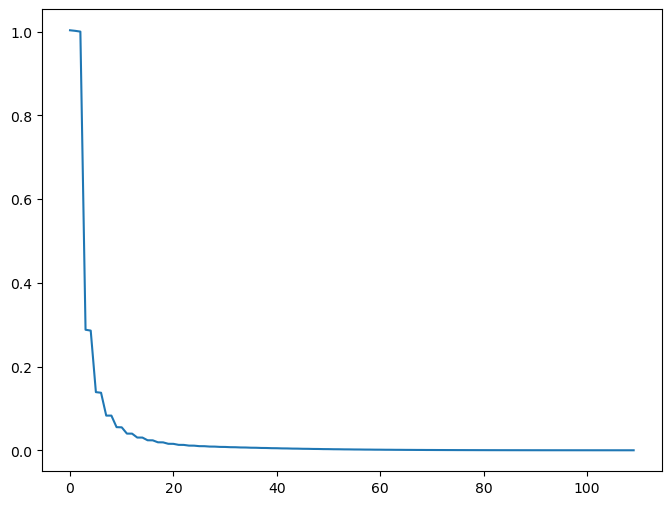

In [7]:
fig = plt.figure(figsize = (8,6))
plt.plot(s)

(0.0, 1.0)

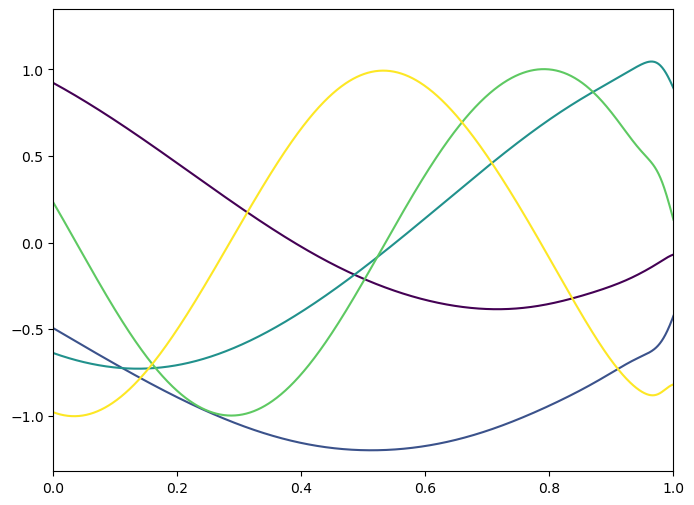

In [8]:
# i = slice(10,20)
i = slice(0,5)
# i = 16
fig = plt.figure(figsize = (8,6))
u[:,i].plot(fig = fig)
# print(np.max(u[:,i].vscale))
# plt.title(f'First {i+1} left singular functions for a Laplacian')
plt.xlim([0,1])
# fig.savefig(f'Laplace-first.png', dpi = fig.dpi)

In [9]:
%%time
theta_ = 0.85
Ginterp = frac.generateNewModel(theta_)

CPU times: user 44.7 s, sys: 52.2 s, total: 1min 36s
Wall time: 34.5 s


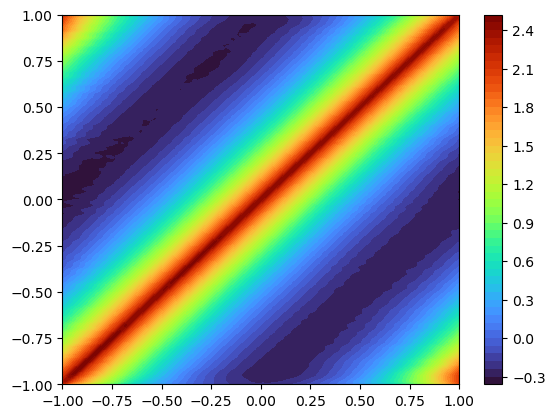

In [10]:
Ginterp.plot()

In [11]:
validation = ChebGreen([theta_], domain, generateData, script, example, dirichletBC)

Generating dataset for example 'fractional_laplacian'
Number of samples: 250
Length scale: 0.01
Nf: 500
Nu: 500
Noise: 0%
---------------------------------------
> In chebfun2/constructor (line 121)
In chebfun2 (line 82)
In generate_fractional (line 31) 
Step = 1/250
Step = 2/250
Step = 3/250
Step = 4/250
Step = 5/250
Step = 6/250
Step = 7/250
Step = 8/250
Step = 9/250
Step = 10/250
Step = 11/250
Step = 12/250
Step = 13/250
Step = 14/250
Step = 15/250
Step = 16/250
Step = 17/250
Step = 18/250
Step = 19/250
Step = 20/250
Step = 21/250
Step = 22/250
Step = 23/250
Step = 24/250
Step = 25/250
Step = 26/250
Step = 27/250
Step = 28/250
Step = 29/250
Step = 30/250
Step = 31/250
Step = 32/250
Step = 33/250
Step = 34/250
Step = 35/250
Step = 36/250
Step = 37/250
Step = 38/250
Step = 39/250
Step = 40/250
Step = 41/250
Step = 42/250
Step = 43/250
Step = 44/250
Step = 45/250
Step = 46/250
Step = 47/250
Step = 48/250
Step = 49/250
Step = 50/250
Step = 51/250
Step = 52/250
Step = 53/250
Step = 54/25

/Users/hsharsh/continuousegf/main/chebGreen/greenlearning/utils.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  U = torch.from_numpy(data['U'].astype(dtype = config(np))).to(device)


Loss at epoch 100: Training = 1.152E-01, Validation = 1.204E-01
Loss at epoch 200: Training = 1.062E-02, Validation = 1.726E-02
Loss at epoch 300: Training = 4.664E-03, Validation = 1.117E-02
Loss at epoch 400: Training = 3.450E-03, Validation = 9.873E-03
Loss at epoch 500: Training = 2.847E-03, Validation = 8.839E-03
Loss at epoch 600: Training = 2.541E-03, Validation = 8.315E-03
Loss at epoch 700: Training = 2.348E-03, Validation = 8.021E-03
Loss at epoch 800: Training = 2.208E-03, Validation = 7.784E-03
Loss at epoch 900: Training = 2.112E-03, Validation = 7.661E-03
Loss at epoch 1000: Training = 2.045E-03, Validation = 7.503E-03
Loss at epoch 1100: Training = 1.976E-03, Validation = 7.515E-03
Loss at epoch 1200: Training = 1.957E-03, Validation = 7.545E-03
Loss at epoch 1300: Training = 1.887E-03, Validation = 7.419E-03
Loss at epoch 1400: Training = 1.867E-03, Validation = 7.375E-03
Loss at epoch 1500: Training = 1.819E-03, Validation = 7.344E-03
Loss at epoch 1600: Training = 1.7

In [12]:
def compareGreen1D(interpModel, exactModel, vmin = None, vmax = None):
    domain = interpModel.domain
    xx = np.linspace(domain[2],domain[3],2000)
    yy = np.linspace(domain[0],domain[1],2000)
    x, s = np.meshgrid(xx,yy)
    
    if vmin is None:
        vmin = min(interpModel.min,exactModel.min)
    if vmax is None:
        vmax = max(interpModel.max,exactModel.max)
        
    plt.figure(figsize = (16,6))
    plt.subplot(121)
    
    GInterp = interpModel[x,s]
    
    levels = np.linspace(vmin, vmax, 50, endpoint = True)
    ticks = np.linspace(vmin, vmax, 10, endpoint=True)
    
    surf = plt.contourf(x, s, GInterp, levels = levels, cmap = 'turbo', vmin = vmin, vmax = vmax)
    plt.gca().set_aspect('equal', adjustable='box')
    cbar = plt.colorbar(ticks = ticks, fraction = 0.046, pad = 0.04)
    cbar.ax.set_yticklabels(["{:4.2f}".format(i) for i in ticks])
    plt.xlabel('$x$', fontsize = 11)
    plt.ylabel('$s$', rotation='horizontal', labelpad=10, fontsize = 11)
    plt.title("Interpolated", fontsize = 14)
    
    GExact = exactModel[x,s]
    
    plt.subplot(122)
    plt.gca().set_aspect('equal', adjustable='box')
    surf = plt.contourf(x, s, GExact, levels = levels, cmap = 'turbo', vmin = vmin, vmax = vmax)
    cbar = plt.colorbar(ticks = ticks, fraction = 0.046, pad = 0.04)
    cbar.ax.set_yticklabels(["{:4.2f}".format(i) for i in ticks])
    plt.xlabel('x', fontsize = 11)
    plt.ylabel('s', rotation='horizontal', labelpad=10, fontsize = 11)
    plt.title("Data", fontsize = 14)

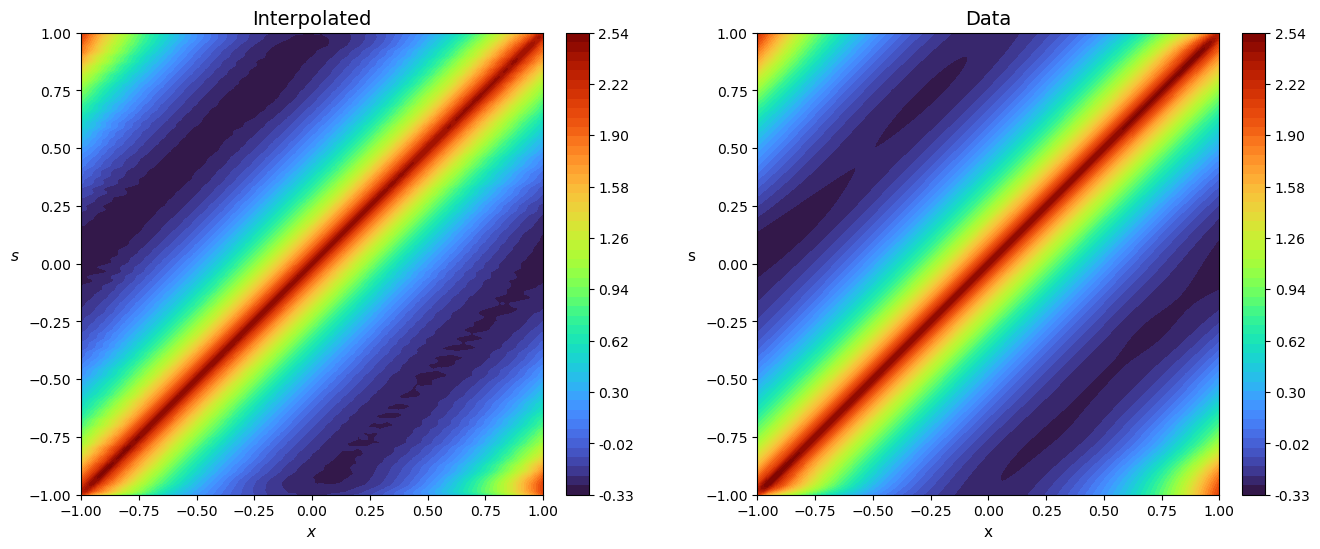

In [13]:
compareGreen1D(Ginterp,validation.G[theta_])